# **Task-02**    

# **Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice,Explore the relationships between variables and identify patterns and trends in the data.**    

# **Harshit Jaiswal**

# **Import necessary libraries**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Load the Titanic dataset**

In [9]:
data = pd.read_csv('/content/train.csv')

In [10]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **1. Data Cleaning**

In [14]:
# Fill missing 'Age' values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to excessive missing values
data.drop(columns=['Cabin'], inplace=True)

# Verify that missing values have been handled
print("\nMissing Values After Cleaning:")
data.isnull().sum()


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **2. Feature Engineering**

In [19]:
# Convert 'Sex' and 'Embarked' into numerical categories
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Display the cleaned dataset
print("\nCleaned Dataset:")
data.head()


Cleaned Dataset:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,NaN,22.0,1,0,7.2500,False,False,True
1,1,1,NaN,38.0,1,0,71.2833,True,False,False
2,1,3,NaN,26.0,0,0,7.9250,False,False,True
3,1,1,NaN,35.0,1,0,53.1000,False,False,True
4,0,3,NaN,35.0,0,0,8.0500,False,False,True


# **Perform EDA**

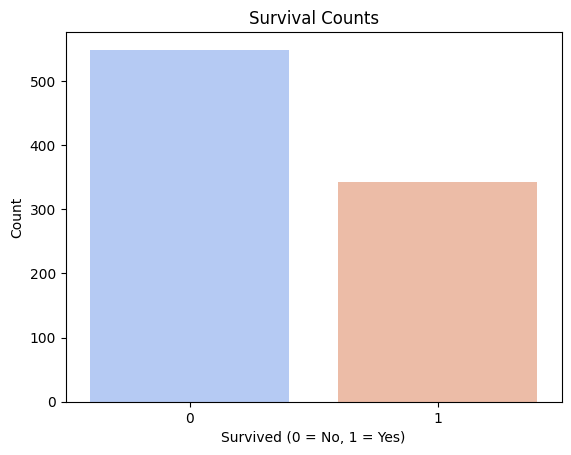

In [30]:
# Survival Counts
sns.countplot(x='Survived', data=data, palette='coolwarm')
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

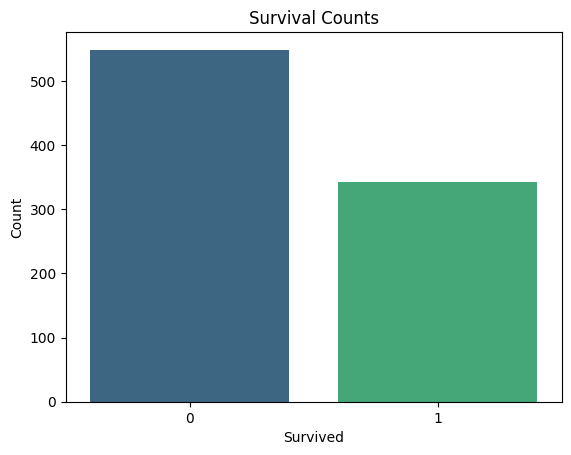

In [32]:
# Survival Rate
survival_counts = data['Survived'].value_counts()
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

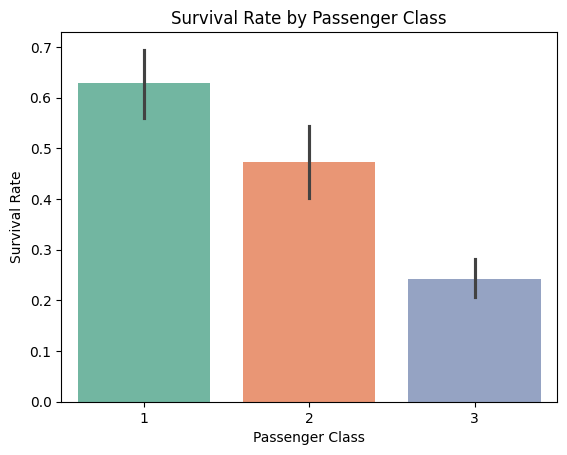

In [27]:
# Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=data, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

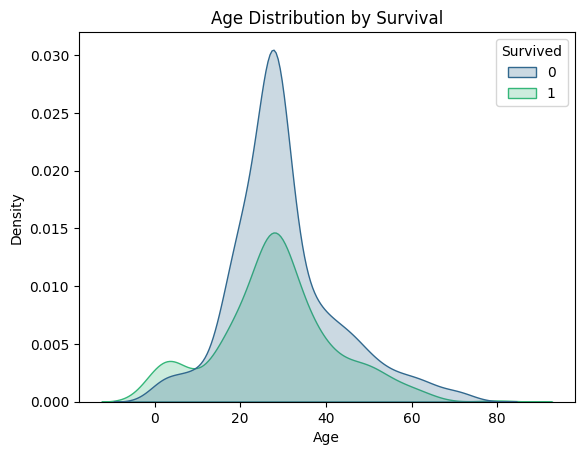

In [28]:
# Age Distribution by Survival
sns.kdeplot(data=data, x='Age', hue='Survived', fill=True, palette='viridis')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

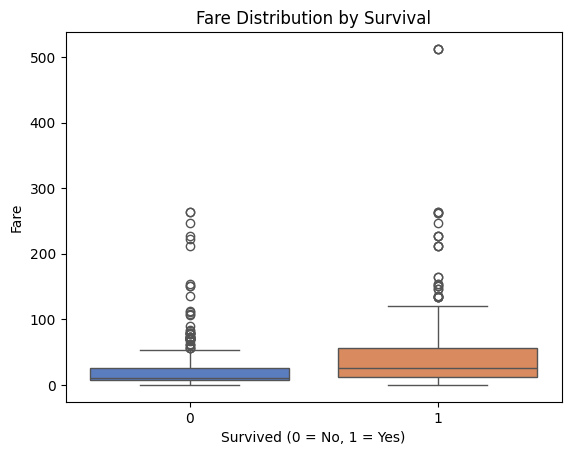

In [29]:
# Fare Distribution by Survival
sns.boxplot(x='Survived', y='Fare', data=data, palette='muted')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

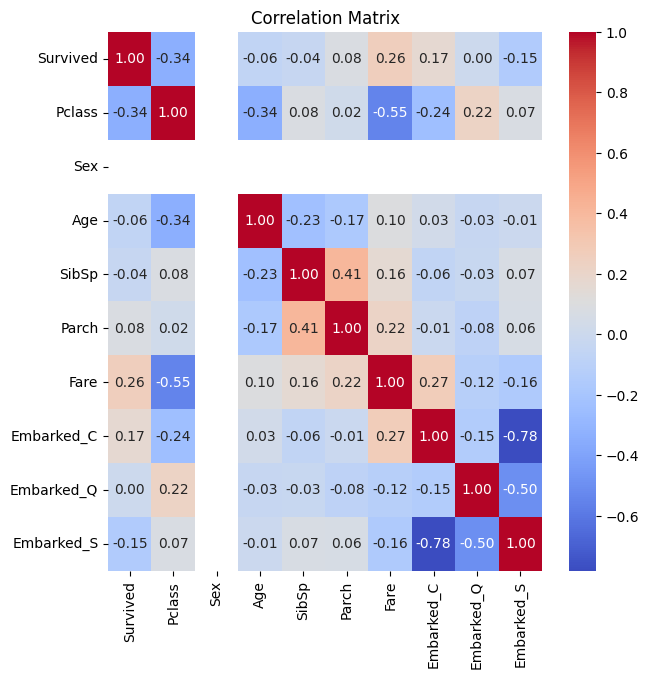

In [33]:
# Correlation Heatmap
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()